In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [2]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 28_03_2022 07_33_48.xlsx'

In [ ]:
if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')

In [3]:
dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
#dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 16_03_2022 07_33_42.xlsx')

In [6]:
filtrado = dados[['Competencia Evolucao','Classificacao final','Evolucao','Idade']]
filtrado

,Competencia Evolucao,Classificacao final,Evolucao,Idade
0,2020_07,SRAG não especificado,Cura,63.0
1,2020_07,COVID-19,Óbito,62.0
2,2020_08,COVID-19,Cura,51.0
3,2020_08,COVID-19,Cura,71.0
4,2020_08,COVID-19,Óbito,60.0
...,...,...,...,...
168670,2021_07,COVID-19,Cura,17.0
168671,2020_11,SRAG não especificado,Óbito,87.0
168672,2020_09,SRAG não especificado,Óbito,84.0
168673,2020_07,SRAG não especificado,Cura,85.0


In [7]:
for index, idade in filtrado.iterrows():
    if idade['Idade'] < 12:
        filtrado.loc[index,'Idade'] = '0-11 anos'
    elif idade['Idade'] < 20:
        filtrado.loc[index,'Idade'] = '12-19 anos'
    elif idade['Idade'] < 40:
        filtrado.loc[index,'Idade'] = '20-39 anos'
    elif idade['Idade'] < 60:
        filtrado.loc[index,'Idade'] = '40-59 anos'
    elif idade['Idade'] < 80:
        filtrado.loc[index,'Idade'] = '60-79 anos'
    elif idade['Idade'] < 150:
        filtrado.loc[index,'Idade'] = '80 e mais'

C:\Users\ryan-rosa\AppData\Local\Temp\ipykernel_23764\1074818694.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrado.loc[index,'Idade'] = '60-79 anos'


In [10]:
filtrado = filtrado.loc[filtrado['Classificacao final']=='COVID-19']
filtrado = filtrado.loc[filtrado['Evolucao']=='Óbito']
filtrado

,Competencia Evolucao,Classificacao final,Evolucao,Idade
1,2020_07,COVID-19,Óbito,60-79 anos
4,2020_08,COVID-19,Óbito,60-79 anos
11,2021_05,COVID-19,Óbito,60-79 anos
14,2021_06,COVID-19,Óbito,60-79 anos
27,2021_11,COVID-19,Óbito,40-59 anos
...,...,...,...,...
168643,2022_02,COVID-19,Óbito,60-79 anos
168644,2021_06,COVID-19,Óbito,40-59 anos
168650,2021_07,COVID-19,Óbito,60-79 anos
168657,2020_11,COVID-19,Óbito,80 e mais


In [16]:
total_obitos = filtrado.groupby('Competencia Evolucao').count()
total_obitos = total_obitos.drop('2020_03')
total_obitos.head()

,Classificacao final,Evolucao,Idade
Competencia Evolucao,,,
2020_04,60,60,60
2020_05,182,182,182
2020_06,440,440,440
2020_07,1391,1391,1391
2020_08,1606,1606,1606


In [34]:
separaIdade = filtrado.groupby(['Idade','Competencia Evolucao']).count()
separaIdade.head()

Classificacao final  Evolucao
Idade      Competencia Evolucao                               
0-11 anos  2020_05                                 1         1
           2020_07                                 1         1
           2020_08                                 2         2
           2020_09                                 1         1
           2020_10                                 3         3
           2021_01                                 1         1
           2021_02                                 4         4
           2021_03                                 2         2
           2021_04                                 3         3
           2021_05                                 1         1
           2021_06                                 3         3
           2021_07                                 3         3
           2021_09                                 2         2
           2021_11                                 1         1
           2022_01                                 4         4
           2022_02                                 7         7
           2022_03                                 1         1
12-19 anos 2020_07                                 3         3
           2020_08                                 6         6
           2020_09                                 1         1
           2020_10                                 2         2
           2020_11                                 1         1
           2020_12                                 1         1
           2021_01                                 3         3
           2021_02                                 2         2
           2021_03                                13        13
           2021_04                                 6         6
           2021_05                                 2         2
           2021_06                                 5         5
           2021_07                                 1         1
           2021_08                                 2         2
           2021_09                                 2         2
           2021_10                                 2         2
           2022_01                                 3         3
           2022_02                                 3         3
           2022_03                                 1         1
20-39 anos 2020_04                                 3         3
           2020_05                                 7         7
           2020_06                                16        16
           2020_07                                47        47
           2020_08                                46        46
           2020_09                                36        36
           2020_10                                27        27
           2020_11                                39        39
           2020_12                                60        60
           2021_01                                32        32
           2021_02                                71        71
           2021_03                               427       427
           2021_04                               251       251
           2021_05                               199       199
           2021_06                               264       264
           2021_07                               128       128
           2021_08                                43        43
           2021_09                                33        33
           2021_10                                18        18
           2021_11                                23        23
           2021_12                                 9         9
           2022_01                                14        14
           2022_02                                27        27
           2022_03                                12        12

In [48]:
idade11 = separaIdade.reset_index()
idade11 = idade11.loc[idade11['Idade']=='0-11 anos']
idade11 = idade11.set_index('Competencia Evolucao')
idade11['Proporcao'] = idade11['Evolucao']/total_obitos['Evolucao']*100
idade11 = idade11.merge(total_obitos,how='outer',right_index=True, left_index=True)
idade11 = idade11.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade11['Proporcao'] = idade11['Proporcao'].fillna(0)
idade11 = idade11['Proporcao']
idade11.tail()

,Idade,Classificacao final,Evolucao
Competencia Evolucao,,,
2021_09,0-11 anos,2,2
2021_11,0-11 anos,1,1
2022_01,0-11 anos,4,4
2022_02,0-11 anos,7,7
2022_03,0-11 anos,1,1


In [49]:
idade19 = separaIdade.reset_index()
idade19 = idade19.loc[idade19['Idade']=='12-19 anos']
idade19 = idade19.set_index('Competencia Evolucao')
idade19['Proporcao'] = idade19['Evolucao']/total_obitos['Evolucao']*100
idade19 = idade19.merge(total_obitos,how='outer',right_index=True, left_index=True)
idade19 = idade19.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade19['Proporcao'] = idade19['Proporcao'].fillna(0)
idade19 = idade19['Proporcao']
idade19.tail()

,Idade,Classificacao final,Evolucao
Competencia Evolucao,,,
2021_09,12-19 anos,2,2
2021_10,12-19 anos,2,2
2022_01,12-19 anos,3,3
2022_02,12-19 anos,3,3
2022_03,12-19 anos,1,1


In [50]:
idade39 = separaIdade.reset_index()
idade39 = idade39.loc[idade39['Idade']=='20-39 anos']
idade39 = idade39.set_index('Competencia Evolucao')
idade39['Proporcao'] = idade39['Evolucao']/total_obitos['Evolucao']*100
idade39 = idade39.merge(total_obitos,how='outer',right_index=True, left_index=True)
idade39 = idade39.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade39['Proporcao'] = idade39['Proporcao'].fillna(0)
idade39 = idade39['Proporcao']
idade39.tail()

,Idade,Classificacao final,Evolucao
Competencia Evolucao,,,
2021_11,20-39 anos,23,23
2021_12,20-39 anos,9,9
2022_01,20-39 anos,14,14
2022_02,20-39 anos,27,27
2022_03,20-39 anos,12,12


In [51]:
idade59 = separaIdade.reset_index()
idade59 = idade59.loc[idade59['Idade']=='40-59 anos']
idade59 = idade59.set_index('Competencia Evolucao')
idade59['Proporcao'] = idade59['Evolucao']/total_obitos['Evolucao']*100
idade59 = idade59.merge(total_obitos,how='outer',right_index=True, left_index=True)
idade59 = idade59.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade59['Proporcao'] = idade59['Proporcao'].fillna(0)
idade59 = idade59['Proporcao']
idade59.tail()

,Idade,Classificacao final,Evolucao
Competencia Evolucao,,,
2021_11,40-59 anos,84,84
2021_12,40-59 anos,37,37
2022_01,40-59 anos,101,101
2022_02,40-59 anos,169,169
2022_03,40-59 anos,47,47


In [52]:
idade79 = separaIdade.reset_index()
idade79 = idade79.loc[idade79['Idade']=='60-79 anos']
idade79 = idade79.set_index('Competencia Evolucao')
idade79['Proporcao'] = idade79['Evolucao']/total_obitos['Evolucao']*100
idade79 = idade79.merge(total_obitos,how='outer',right_index=True, left_index=True)
idade79 = idade79.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade79['Proporcao'] = idade79['Proporcao'].fillna(0)
idade79 = idade79.drop(['2020_03'])
idade79 = idade79['Proporcao']
idade79.tail()

,Idade,Classificacao final,Evolucao
Competencia Evolucao,,,
2021_11,60-79 anos,357,357
2021_12,60-79 anos,148,148
2022_01,60-79 anos,281,281
2022_02,60-79 anos,600,600
2022_03,60-79 anos,235,235


In [53]:
idade80 = separaIdade.reset_index()
idade80 = idade80.loc[idade80['Idade']=='80 e mais']
idade80 = idade80.set_index('Competencia Evolucao')
idade80['Proporcao'] = idade80['Evolucao']/total_obitos['Evolucao']*100
idade80 = idade80.merge(total_obitos,how='outer',right_index=True, left_index=True)
idade80 = idade80.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade80['Proporcao'] = idade80['Proporcao'].fillna(0)
idade80 = idade80.drop(['2020_03'])
idade80 = idade80['Proporcao']
idade80.tail()

,Idade,Classificacao final,Evolucao
Competencia Evolucao,,,
2021_11,80 e mais,122,122
2021_12,80 e mais,61,61
2022_01,80 e mais,245,245
2022_02,80 e mais,570,570
2022_03,80 e mais,190,190


In [45]:
eixo_x = idade80.to_frame()
eixo_x = eixo_x.reset_index()
eixo_x = eixo_x['Competencia Evolucao']
eixo_x

0     2020_04
1     2020_05
2     2020_06
3     2020_07
4     2020_08
5     2020_09
6     2020_10
7     2020_11
8     2020_12
9     2021_01
10    2021_02
11    2021_03
12    2021_04
13    2021_05
14    2021_06
15    2021_07
16    2021_08
17    2021_09
18    2021_10
19    2021_11
20    2021_12
21    2022_01
22    2022_02
23    2022_03
Name: Competencia Evolucao, dtype: object

In [46]:
legenda = pd.DataFrame(columns=['0-11','12-19','20-39','40-59','60-79','80 e mais'])

In [ ]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

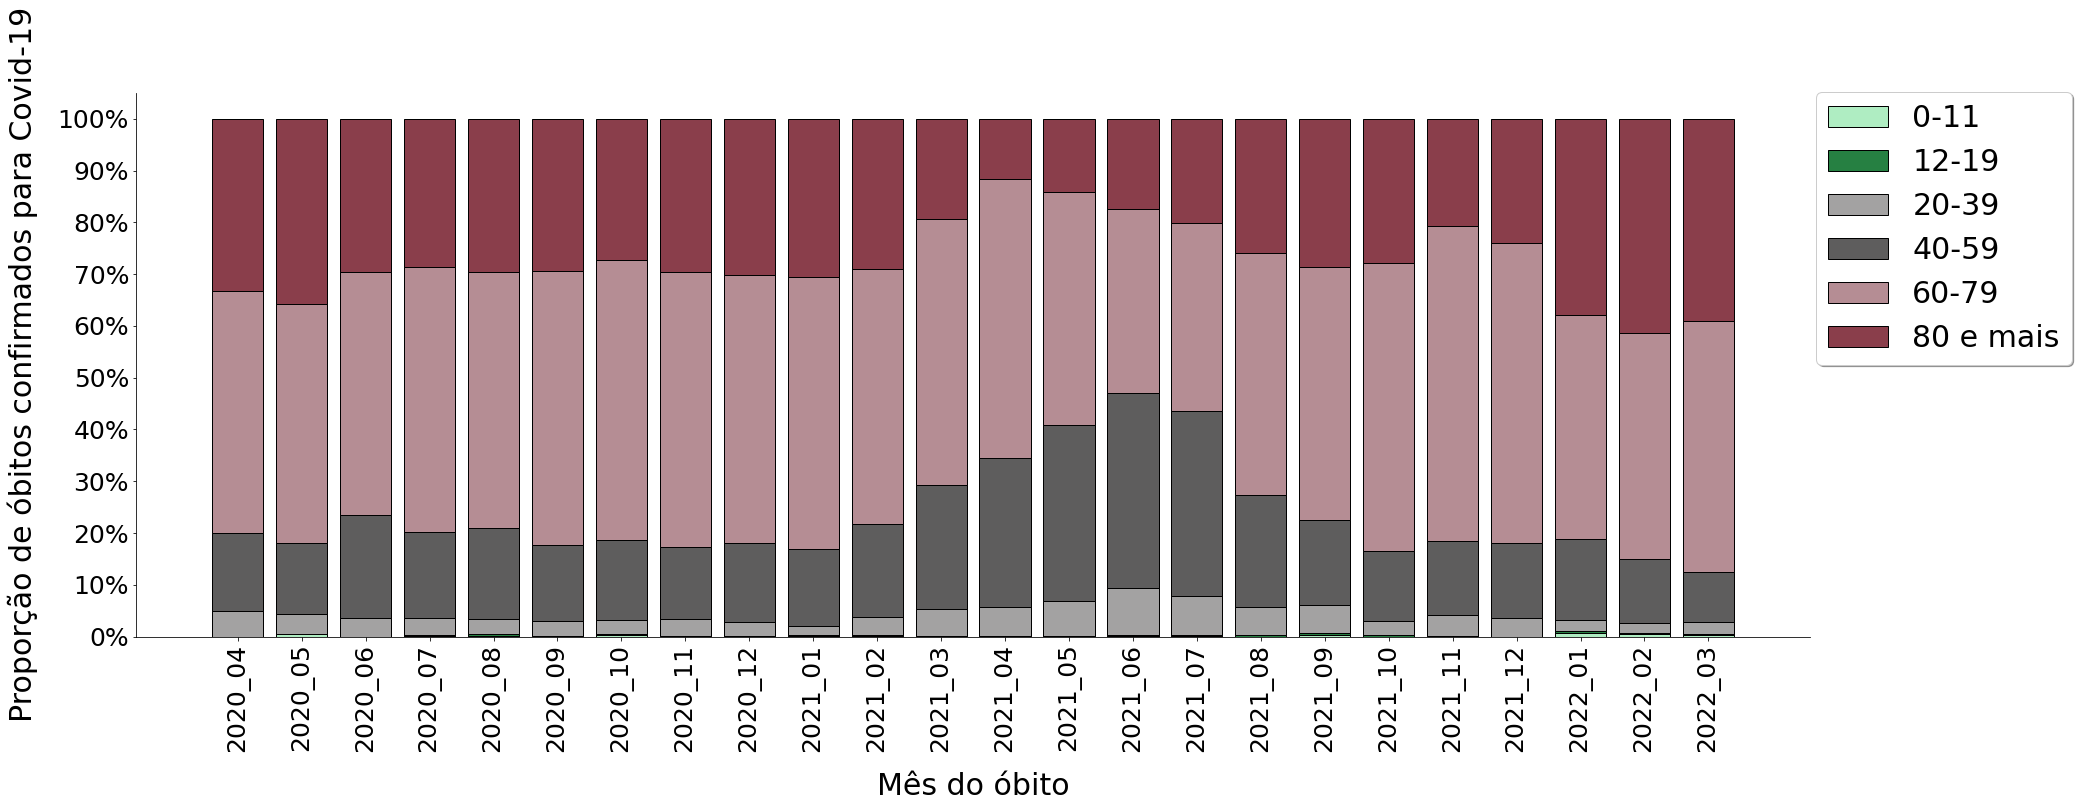

In [47]:
plt.figure(figsize=(30,10))
plt.bar(eixo_x,idade11, color='#afedc2',edgecolor='#000000')
plt.bar(eixo_x,idade19, bottom=idade11, color="#268042",edgecolor='#000000')
plt.bar(eixo_x,idade39, bottom=idade11 + idade19, color='#a3a2a2',edgecolor='#000000')
plt.bar(eixo_x,idade59, bottom=idade11 + idade19 + idade39, color='#5e5d5d',edgecolor='#000000')
plt.bar(eixo_x,idade79, bottom=idade11 + idade19 + idade39 + idade59, color='#b58d94',edgecolor='#000000')
plt.bar(eixo_x,idade80, bottom=idade11 + idade19 + idade39 + idade59 + idade79, color='#8a3e4b',edgecolor='#000000')
sns.despine()
plt.xticks(rotation=90,fontsize=25)
plt.xlabel('Mês do óbito',fontsize=30,labelpad=20)
plt.yticks(np.arange(0,110,10),fontsize=25)
plt.ylabel('Proporção de óbitos confirmados para Covid-19',fontsize=30,labelpad=20)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()])
plt.legend(legenda,loc='upper center',fancybox=True,bbox_to_anchor=(1.08,1.03),fontsize=30,shadow=True)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Slide11.png',dpi=720,bbox_inches='tight')